# SVM_IRIS

### Importing Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

### Load and preparing Dataset

In [14]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # petal length and width
y = iris.target

### Train-test split dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

### Standardize the data

In [16]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Train SVM Model

In [18]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=42)

### Predict and evaluate

In [19]:
y_pred = svm.predict(X_test_std)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.91


In [20]:
# Combine train & test for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#### Plot decision boundary function

In [21]:
def plot_decision_regions(X, y, classifier, test_idx=None):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                    c=colors[idx], marker=markers[idx],
                    label=iris.target_names[cl], edgecolor='black')

    if test_idx is not None:
        X_test_vis = X[test_idx, :]
        plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1],
                    facecolors='none', edgecolor='black',
                    s=100, label='Test set')

    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('SVM Decision Boundary')
    plt.tight_layout()
    plt.show()

### Visualize

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\3945564315.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


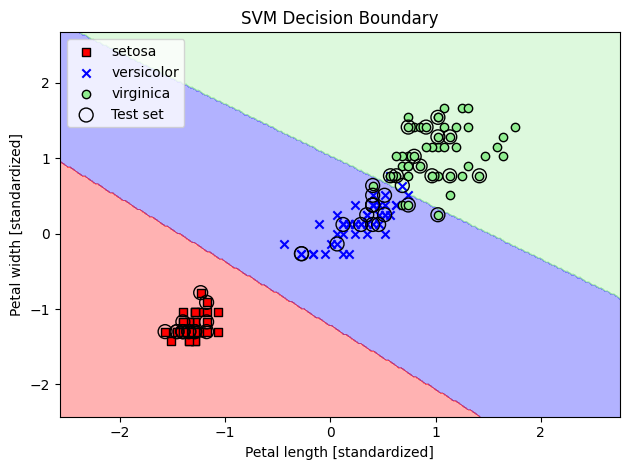

In [22]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(len(y_train), len(y_combined)))